# Purpose of Dataset Selected

The purpose of our project is to determine the reliability of an airline based on their prior on-time statistics spanning data for one year.

The following dataset is downloaded from the bureau of transportation website and contains metrics for domestic flights by major carriers.  It contains on-time arrival data such as departure and arrival delays, origin and destination airports, flight numbers, scheduled and actual departure and arrival times, cancelled or diverted flights, taxi-out and taxi-in times, air time, and non-stop distance.

For the purpose of this study, we downloaded data spanning March 2016 to February 2017.  There are 6,032,365 total records and 98 attributes in total.

# Business Understanding

In order to gauge whether the flight is reliable, we will use the following dataset features:  Departure delay, Arrival Delay, 
Cancelled, and Diverted.  

A reliable airline is defined as one where, if the flight is delayed/diverted then, departure delay is 
less than or equal to 60 minutes and arrival delay is less than or equal to 30 minutes.  In addition, the flight cancellation
rate should be <=30% for a given month.  

The data in the present dataset includes features such as weather delay, CarrierDelay,NASDelay, SecurityDelay and 
LateAircraftDelay timings in minutes.  One potential approach to predict the future reliability of the
flight could be to do cluster analysis for each airline by month based on the above delay conditions and predict future delays.
We can do stratified cross validation there forth and do Precision-Recall curve analysis to classify "positive" class outcomes.

# Data Meaning Type

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [3]:
pd.read_clipboard(sep='\t')

Field Name  \
0   Year                 
1   Quarter              
2   Month                
3   DayofMonth           
4   DayOfWeek            
5   FlightDate           
6   UniqueCarrier        
7   AirlineID            
8   Carrier              
9   TailNum              
10  FlightNum            
11  OriginAirportID      
12  OriginAirportSeqID   
13  OriginCityMarketID   
14  Origin               
15  OriginCityName       
16  OriginState          
17  OriginStateFips      
18  OriginStateName      
19  OriginWac            
20  DestAirportID        
21  DestAirportSeqID     
22  DestCityMarketID     
23  Dest                 
24  DestCityName         
25  DestState            
26  DestStateFips        
27  DestStateName        
28  DestWac              
29  CRSDepTime           
..         ...           
68  DivDistance          
69  Div1Airport          
70  Div1AirportID        
71  Div1AirportSeqID     
72  Div1WheelsOn         
73  Div1TotalGTime       
74  Div1LongestGTime     
75  Div1WheelsOff        
76  Div1TailNum          
77  Div2Airport          
78  Div2AirportID        
79  Div2AirportSeqID     
80  Div2WheelsOn         
81  Div2TotalGTime       
82  Div2LongestGTime     
83  Div2WheelsOff        
84  Div2TailNum          
85  Div3Airport          
86  Div3AirportID        
87  Div3AirportSeqID     
88  Div3WheelsOn         
89  Div3TotalGTime       
90  Div3LongestGTime     
91  Div3WheelsOff        
92  Div3TailNum          
93  Div4Airport          
94  Div4AirportID        
95  Div4AirportSeqID     
96  Div4WheelsOn         
97  Div4TotalGTime       

                                                                                                                                                                                                                                         Field Description  
0   Year                                                                                                                                                                                                                                                    
1   Quarter (1-4)                                                                                                                                                                                                                                           
2   Month                                                                                                                                                                                                                                                   
3   Day of Month                                                                                                                                                                                                                                            
4   Day of Week                                                                                                                                                                                                                                             
5   Flight Date (yyyymmdd)                                                                                                                                                                                                                                  
6   Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.                                             
7   An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.     
8   Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different ca

In addition, please note the above definitions refer to CRS, which is referring to the Computer Reservation System that provides
information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets.

Late Flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time.

Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.

A Diverted flight is a flight that is required to land at a destination other than the original scheduled destination for reasons beyond the control of the pilot/company.

Elapsed time is the time computed from gate departure time to gate arrival time.

FIPS is a unique identifier assigned by Federal Information Processing Standards to any of a variety of geographic entities (e.g. counties, states, metropolitan areas, etc).  WAC are similar to FIPS but assigned codes are by Office of Airline Information (OAI) and are created by OAI.

# Data Quality

Before we get into data quality, we would like to detail how we came up with the dataset that we used to perform analysis on. Since our original dataset consisted of 6 million records, we decided to sample the data. We used random sampling and we sampled 10 percent of the data by month. Below is the code we used to get a representative sample of the data.

In [ ]:
import pandas as pd
# Read the csv files by year and month
# DataFrame for March 2016
df1 = pd.read_csv('./Data/201603.csv', index_col=0)
# DataFrame for April 2016
df2 = pd.read_csv('./Data/201604.csv', index_col=0)
# DataFrame for May 2016
df3 = pd.read_csv('./Data/201605.csv', index_col=0)
# DataFrame for June 2016
df4 = pd.read_csv('./Data/201606.csv', index_col=0)
# DataFrame for July 2016
df5 = pd.read_csv('./Data/201607.csv', index_col=0)
# DataFrame for August 2016
df6 = pd.read_csv('./Data/201608.csv', index_col=0)
# DataFrame for September 2016
df7 = pd.read_csv('./Data/201609.csv', index_col=0)
# DataFrame for October 2016
df8 = pd.read_csv('./Data/201610.csv', index_col=0)
# DataFrame for November 2016
df9 = pd.read_csv('./Data/201611.csv', index_col=0)
# DataFrame for December 2016
df10 = pd.read_csv('./Data/201612.csv', index_col=0)
# DataFrame for January 2017
df11 = pd.read_csv('./Data/201701.csv', index_col=0)
# DataFrame for February 2017
df12 = pd.read_csv('./Data/201702.csv', index_col=0)

In [ ]:
# Headers for the sampled data set
cols = ['YEAR','QUARTER','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','FL_DATE','UNIQUE_CARRIER','AIRLINE_ID','CARRIER','TAIL_NUM','FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','ORIGIN_STATE_FIPS','ORIGIN_STATE_NM','ORIGIN_WAC','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID','DEST','DEST_CITY_NAME','DEST_STATE_ABR','DEST_STATE_FIPS','DEST_STATE_NM','DEST_WAC','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP','DEP_TIME_BLK','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','CRS_ARR_TIME','ARR_TIME','ARR_DELAY','ARR_DELAY_NEW','ARR_DEL15','ARR_DELAY_GROUP','ARR_TIME_BLK','CANCELLED','CANCELLATION_CODE','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','FLIGHTS','DISTANCE','DISTANCE_GROUP','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','FIRST_DEP_TIME','TOTAL_ADD_GTIME','LONGEST_ADD_GTIME','DIV_AIRPORT_LANDINGS','DIV_REACHED_DEST','DIV_ACTUAL_ELAPSED_TIME','DIV_ARR_DELAY','DIV_DISTANCE','DIV1_AIRPORT','DIV1_AIRPORT_ID','DIV1_AIRPORT_SEQ_ID','DIV1_WHEELS_ON','DIV1_TOTAL_GTIME','DIV1_LONGEST_GTIME','DIV1_WHEELS_OFF','DIV1_TAIL_NUM','DIV2_AIRPORT','DIV2_AIRPORT_ID','DIV2_AIRPORT_SEQ_ID','DIV2_WHEELS_ON','DIV2_TOTAL_GTIME','DIV2_LONGEST_GTIME','DIV2_WHEELS_OFF','DIV2_TAIL_NUM','DIV3_AIRPORT','DIV3_AIRPORT_ID','DIV3_AIRPORT_SEQ_ID','DIV3_WHEELS_ON','DIV3_TOTAL_GTIME','DIV3_LONGEST_GTIME','DIV3_WHEELS_OFF','DIV3_TAIL_NUM','DIV4_AIRPORT','DIV4_AIRPORT_ID','DIV4_AIRPORT_SEQ_ID','DIV4_WHEELS_ON','DIV4_TOTAL_GTIME','DIV4_LONGEST_GTIME','DIV4_WHEELS_OFF','DIV4_TAIL_NUM','DIV5_AIRPORT','DIV5_AIRPORT_ID','DIV5_AIRPORT_SEQ_ID','DIV5_WHEELS_ON','DIV5_TOTAL_GTIME','DIV5_LONGEST_GTIME','DIV5_WHEELS_OFF','DIV5_TAIL_NUM']
# List of data frames holding the individual monthly data
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
# Initialized the dataset which will hold 10% of samples per month
df = pd.DataFrame(columns=cols)
# Loop through each of the data frames
for dataframe in dataframes:
    df = pd.concat([df, dataframe.sample(frac=0.1)])
# Save the sample data to file
file_name = './Data/sampled.csv'
df.to_csv(file_name, sep=',', encoding='utf-8')

Now that we have sampled the dataset, lets take a look at the data and gather some basic information about this dataset. 

In [2]:
import pandas as pd
# Read the sampled csv file
df_sampled = pd.read_csv('./Data/sampled.csv', index_col=0)
# Look at the first few records in the dataset
df_sampled.head()

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (44,48) have mixed types. Specify dtype option on import or set low_memory=False.



ACTUAL_ELAPSED_TIME  AIRLINE_ID  AIR_TIME  ARR_DEL15  ARR_DELAY  \
2016                 47.0     20304.0      19.0        0.0      -17.0   
2016                 66.0     19790.0      50.0        1.0       27.0   
2016                153.0     19930.0     136.0        0.0      -16.0   
2016                369.0     19790.0     352.0        0.0      -14.0   
2016                 68.0     20366.0      45.0        0.0      -18.0   

      ARR_DELAY_GROUP  ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  \
2016             -2.0            0.0    2335.0    2300-2359               NaN   
2016              1.0           27.0    1530.0    1500-1559               NaN   
2016             -2.0            0.0    1244.0    1300-1359               NaN   
2016             -1.0            0.0    2049.0    2100-2159               NaN   
2016             -2.0            0.0    1824.0    1800-1859               NaN   

      ...   TAIL_NUM TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  UNIQUE_CARRIER  \
2016  ...     N934SW     8.0      20.0              NaN              OO   
2016  ...     N906AT     6.0      10.0              NaN              DL   
2016  ...     N619AS     7.0      10.0              NaN              AS   
2016  ...     N594NW     5.0      12.0              NaN              DL   
2016  ...     N14158     4.0      19.0              NaN              EV   

      Unnamed: 109  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  
2016           NaN            NaN      2308.0     2327.0   NaN  
2016           NaN            0.0      1434.0     1524.0   NaN  
2016           NaN            NaN      1021.0     1237.0   NaN  
2016           NaN            NaN      1752.0     2044.0   NaN  
2016           NaN            NaN      1735.0     1820.0   NaN  

[5 rows x 110 columns]

Looking at this data we see that there are there are quiet a few NaN values in this dataset and the "YEAR" field looks like it does not have any values at all. Also, there seems to be a field "Unnamed: 109" that does not have any value in our analysis. This seems to have happened while we were sampling the dataset. We can go ahead and imput the "YEAR" field from the index and drop the "Unnamed: 109" field. We can see the results of this action below.

In [3]:
df_sampled1 = df_sampled.drop('Unnamed: 109', axis=1)
df_sampled1['YEAR'] = df_sampled1['FL_DATE'].str[:4]
df_sampled1.head()

ACTUAL_ELAPSED_TIME  AIRLINE_ID  AIR_TIME  ARR_DEL15  ARR_DELAY  \
2016                 47.0     20304.0      19.0        0.0      -17.0   
2016                 66.0     19790.0      50.0        1.0       27.0   
2016                153.0     19930.0     136.0        0.0      -16.0   
2016                369.0     19790.0     352.0        0.0      -14.0   
2016                 68.0     20366.0      45.0        0.0      -18.0   

      ARR_DELAY_GROUP  ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  \
2016             -2.0            0.0    2335.0    2300-2359               NaN   
2016              1.0           27.0    1530.0    1500-1559               NaN   
2016             -2.0            0.0    1244.0    1300-1359               NaN   
2016             -1.0            0.0    2049.0    2100-2159               NaN   
2016             -2.0            0.0    1824.0    1800-1859               NaN   

      ...   SECURITY_DELAY TAIL_NUM  TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  \
2016  ...              NaN   N934SW      8.0      20.0              NaN   
2016  ...              0.0   N906AT      6.0      10.0              NaN   
2016  ...              NaN   N619AS      7.0      10.0              NaN   
2016  ...              NaN   N594NW      5.0      12.0              NaN   
2016  ...              NaN   N14158      4.0      19.0              NaN   

      UNIQUE_CARRIER  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  
2016              OO            NaN      2308.0     2327.0  2016  
2016              DL            0.0      1434.0     1524.0  2016  
2016              AS            NaN      1021.0     1237.0  2016  
2016              DL            NaN      1752.0     2044.0  2016  
2016              EV            NaN      1735.0     1820.0  2016  

[5 rows x 109 columns]

In [4]:
df_sampled1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560850 entries, 2016 to 2017
Columns: 109 entries, ACTUAL_ELAPSED_TIME to YEAR
dtypes: float64(89), object(20)
memory usage: 470.7+ MB


We also see that there are a total of 109 column and 560,850 records in the sampled dataset. 89 of these attributes are of type float whereas the rest 20 are of type object.

Of these fields, there are some ID fields which do not bring value to the model and analysis which we can get rid of from the dataset. These include "AIRLINE_ID", "DEST_AIRPORT_ID", "DEST_AIRPORT_SEQ_ID", "DEST_CITY_MARKET_ID", "DIV1_AIRPORT_ID", "DIV1_AIRPORT_SEQ_ID", "DIV2_AIRPORT_ID", "DIV2_AIRPORT_SEQ_ID", "DIV3_AIRPORT_ID", "DIV3_AIRPORT_SEQ_ID", "DIV4_AIRPORT_ID", "DIV4_AIRPORT_SEQ_ID", "DIV5_AIRPORT_ID", "DIV5_AIRPORT_SEQ_ID", "ORIGIN_AIRPORT_ID", "ORIGIN_AIRPORT_SEQ_ID", and "ORIGIN_CITY_MARKET_ID".

We also noticed that there are some fields which do not have any data at all, which makes sense since of all the flight that were diverted there were none that we diverted beyond airport 2. We can get rid of these fields as well. "DIV3_AIRPORT", "DIV3_LONGEST_GTIME", "DIV3_TAIL_NUM", "DIV3_TOTAL_GTIME", "DIV3_WHEELS_OFF", "DIV3_WHEELS_ON", "DIV4_AIRPORT", "DIV4_LONGEST_GTIME", "DIV4_TAIL_NUM", "DIV4_TOTAL_GTIME", "DIV4_WHEELS_OFF", "DIV4_WHEELS_ON", "DIV4_AIRPORT", "DIV4_LONGEST_GTIME", "DIV4_TAIL_NUM", "DIV4_TOTAL_GTIME", "DIV4_WHEELS_OFF", "DIV4_WHEELS_ON", "DIV5_AIRPORT", "DIV5_LONGEST_GTIME", "DIV4_TAIL_NUM", "DIV4_TOTAL_GTIME", "DIV4_WHEELS_OFF", "DIV4_WHEELS_ON". 

In [5]:
# Remove all the ID fields
if 'AIRLINE_ID' in df_sampled1:
    del df_sampled1['AIRLINE_ID']
if 'DEST_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DEST_AIRPORT_ID']
if 'DEST_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DEST_AIRPORT_SEQ_ID']
if 'DEST_CITY_MARKET_ID' in df_sampled1:
    del df_sampled1['DEST_CITY_MARKET_ID']
if 'DIV1_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV1_AIRPORT_ID']
if 'DIV1_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV1_AIRPORT_SEQ_ID']
if 'DIV2_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV2_AIRPORT_ID']
if 'DIV2_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV2_AIRPORT_SEQ_ID']
if 'DIV3_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT_ID']
if 'DIV3_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT_SEQ_ID']
if 'DIV4_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT_ID']
if 'DIV4_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT_SEQ_ID']
if 'DIV5_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT_ID']
if 'DIV5_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT_SEQ_ID']
if 'ORIGIN_AIRPORT_ID' in df_sampled1:
    del df_sampled1['ORIGIN_AIRPORT_ID']
if 'ORIGIN_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['ORIGIN_AIRPORT_SEQ_ID']
if 'ORIGIN_CITY_MARKET_ID' in df_sampled1:
    del df_sampled1['ORIGIN_CITY_MARKET_ID']
    
# Looking to see if these fields are completely empty
airline_cols = ['DIV3_AIRPORT', 'DIV3_LONGEST_GTIME', 'DIV3_TAIL_NUM', 'DIV3_TOTAL_GTIME', 'DIV3_WHEELS_OFF', 'DIV3_WHEELS_ON', 'DIV4_AIRPORT', 'DIV4_LONGEST_GTIME', 'DIV4_TAIL_NUM', 'DIV4_TOTAL_GTIME', 'DIV4_WHEELS_OFF', 'DIV4_WHEELS_ON', 'DIV4_AIRPORT', 'DIV4_LONGEST_GTIME', 'DIV4_TAIL_NUM', 'DIV4_TOTAL_GTIME', 'DIV4_WHEELS_OFF', 'DIV4_WHEELS_ON', 'DIV5_AIRPORT', 'DIV5_LONGEST_GTIME', 'DIV4_TAIL_NUM', 'DIV4_TOTAL_GTIME', 'DIV4_WHEELS_OFF', 'DIV4_WHEELS_ON']
for col in airline_cols:
   print df_sampled1[col].value_counts(dropna=False)

# Remove all the Diverted Fields above DIV3 fields
if 'DIV3_AIRPORT' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT']
if 'DIV3_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV3_LONGEST_GTIME']
if 'DIV3_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV3_TAIL_NUM']
if 'DIV3_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV3_TOTAL_GTIME']
if 'DIV3_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV3_WHEELS_OFF']
if 'DIV3_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV3_WHEELS_ON']
if 'DIV4_AIRPORT' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT']
if 'DIV4_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV4_LONGEST_GTIME']
if 'DIV4_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV4_TAIL_NUM']
if 'DIV4_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV4_TOTAL_GTIME']
if 'DIV4_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV4_WHEELS_OFF']
if 'DIV4_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV4_WHEELS_ON']
if 'DIV5_AIRPORT' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT']
if 'DIV5_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV5_LONGEST_GTIME']
if 'DIV5_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV5_TAIL_NUM']
if 'DIV5_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV5_TOTAL_GTIME']
if 'DIV5_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV5_WHEELS_OFF']
if 'DIV5_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV5_WHEELS_ON']
    
df_sampled1.info()

NaN    560850
Name: DIV3_AIRPORT, dtype: int64
NaN    560850
Name: DIV3_LONGEST_GTIME, dtype: int64
NaN    560850
Name: DIV3_TAIL_NUM, dtype: int64
NaN    560850
Name: DIV3_TOTAL_GTIME, dtype: int64
NaN    560850
Name: DIV3_WHEELS_OFF, dtype: int64
NaN    560850
Name: DIV3_WHEELS_ON, dtype: int64
NaN    560850
Name: DIV4_AIRPORT, dtype: int64
NaN    560850
Name: DIV4_LONGEST_GTIME, dtype: int64
NaN    560850
Name: DIV4_TAIL_NUM, dtype: int64
NaN    560850
Name: DIV4_TOTAL_GTIME, dtype: int64
NaN    560850
Name: DIV4_WHEELS_OFF, dtype: int64
NaN    560850
Name: DIV4_WHEELS_ON, dtype: int64
NaN    560850
Name: DIV4_AIRPORT, dtype: int64
NaN    560850
Name: DIV4_LONGEST_GTIME, dtype: int64
NaN    560850
Name: DIV4_TAIL_NUM, dtype: int64
NaN    560850
Name: DIV4_TOTAL_GTIME, dtype: int64
NaN    560850
Name: DIV4_WHEELS_OFF, dtype: int64
NaN    560850
Name: DIV4_WHEELS_ON, dtype: int64
NaN    560850
Name: DIV5_AIRPORT, dtype: int64
NaN    560850
Name: DIV5_LONGEST_GTIME, dtype: int64
NaN   

We then look at some of the fields that are really representing the same information across different features.

The fields that we will be looking together are as below:
1. Features that give the information about the airline ('UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM')
2. Features that give the information about the origin ('ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC')
3. Features that give the information about the destination ('DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC')

Based on our analysis we removed the below fields since they are redundant and carry the same information about either the Airline, Origin and Destination: 
'UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', and 'DEST_WAC'.

This leaves us with 66 total attributes of which 50 are of float type and 16 are of object type.

In [6]:
# Similar columns related to airlines info
airline_cols = ['UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM']
for col in airline_cols:
   print df_sampled1[col].value_counts(dropna=False)

# UNIQUE_CARRIER and CARRIER are the same for this sample
if 'UNIQUE_CARRIER' in df_sampled1:
    del df_sampled1['UNIQUE_CARRIER']
# We can drop the tail number since there are a lot of NaNs in this data
if 'TAIL_NUM' in df_sampled1:
    del df_sampled1['TAIL_NUM']
    
# Similar columns related to origin info
origin_cols = ['ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC']
for col in origin_cols:
   print df_sampled1[col].value_counts(dropna=False)

# Based on the analysis above we can drop ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_WAC
# We should also be able to drop DEST_STATE_ABR, DEST_STATE_FIPS, DEST_WAC
if 'ORIGIN_STATE_ABR' in df_sampled1:
    del df_sampled1['ORIGIN_STATE_ABR']
if 'ORIGIN_STATE_FIPS' in df_sampled1:
    del df_sampled1['ORIGIN_STATE_FIPS']
if 'ORIGIN_WAC' in df_sampled1:
    del df_sampled1['ORIGIN_WAC']
if 'DEST_STATE_ABR' in df_sampled1:
    del df_sampled1['DEST_STATE_ABR']
if 'DEST_STATE_FIPS' in df_sampled1:
    del df_sampled1['DEST_STATE_FIPS']
if 'DEST_WAC' in df_sampled1:
    del df_sampled1['DEST_WAC']

df_sampled1.info()

WN    129900
DL     91944
AA     90773
OO     61201
UA     54901
EV     47485
B6     28456
AS     17710
NK     14091
F9      9698
HA      7683
VX      7008
Name: UNIQUE_CARRIER, dtype: int64
WN    129900
DL     91944
AA     90773
OO     61201
UA     54901
EV     47485
B6     28456
AS     17710
NK     14091
F9      9698
HA      7683
VX      7008
Name: CARRIER, dtype: int64
NaN       895
N492HA    389
N481HA    389
N493HA    379
N477HA    378
N485HA    378
N487HA    376
N479HA    366
N484HA    363
N486HA    352
N476HA    347
N480HA    340
N491HA    327
N483HA    322
N490HA    307
N475HA    305
N489HA    301
N478HA    283
N667GB    269
N488HA    267
N435SW    257
N914EV    255
N633AE    254
N685AE    248
N680AE    243
N672AE    242
N938WN    242
N632SW    240
N967SW    238
N457SW    238
         ... 
N851NW      1
N77012      1
N7BWAA      1
N268AK      1
N78001      1
N76010      1
N976JB      1
N844MH      1
N204UA      1
N860NW      1
N57016      1
N180UA      1
N666DN      1
N751AT   

Next we look at Nan in our dataset. We see that there are a lot of features that contain Nan values. We look at one particular field 'ACTUAL_ELAPSED_TIME'.

From our analysis we see that most of the fields are empty for valid reason as shown by the analysis below which shows that if we take out the Cancelled and Diverted flight out from our data set, there fields do not have an empty values and thus we can apply  the below imputation techniques.

For flights that were cancelled or diverted
1. For dealys in minutes, we apply a value of 9999.
2. For travel time, we apply a value of 0.
3. For time stamp , we apply a value of 3600.

In [7]:
# Look at the fields that have a NaN value in them
print(df_sampled1.isnull().any())

origin_cols = ['ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_GROUP', 'ARR_DELAY_NEW', 'ARR_TIME',  'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_GROUP', 'DEP_DELAY_NEW', 'DEP_TIME', 'TAXI_IN', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON']
for col in origin_cols:
   print df_sampled1[col].value_counts(dropna=False)

# Here we look at the field 'ACTUAL_ELAPSED_TIME'
df_sampled1[pd.isnull(df_sampled1['ACTUAL_ELAPSED_TIME'])]

ACTUAL_ELAPSED_TIME         True
AIR_TIME                    True
ARR_DEL15                   True
ARR_DELAY                   True
ARR_DELAY_GROUP             True
ARR_DELAY_NEW               True
ARR_TIME                    True
ARR_TIME_BLK               False
CANCELLATION_CODE           True
CANCELLED                  False
CARRIER                    False
CARRIER_DELAY               True
CRS_ARR_TIME               False
CRS_DEP_TIME               False
CRS_ELAPSED_TIME            True
DAY_OF_MONTH               False
DAY_OF_WEEK                False
DEP_DEL15                   True
DEP_DELAY                   True
DEP_DELAY_GROUP             True
DEP_DELAY_NEW               True
DEP_TIME                    True
DEP_TIME_BLK               False
DEST                       False
DEST_CITY_NAME             False
DEST_STATE_NM              False
DISTANCE                   False
DISTANCE_GROUP             False
DIV1_AIRPORT                True
DIV1_LONGEST_GTIME          True
          

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
2016                  NaN       NaN        NaN        NaN              NaN   
...                   ...       ...        ...        ...              ...   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN       NaN        NaN        NaN              NaN   
2017                  NaN   

In [8]:
# Data frame that has filtered out Cancelled flights
df_sampled1_notcancelled = df_sampled1[df_sampled1['CANCELLED']==0]
# Data frame that has filters out Cancelled and Diverted flights
df_sampled1_notcancelled_notdiverted = df_sampled1_notcancelled[df_sampled1_notcancelled['DIVERTED']==0]

# Check to see if there are any NaNs
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['ACTUAL_ELAPSED_TIME'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['AIR_TIME'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['ARR_DEL15'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['ARR_DELAY'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['ARR_DELAY_GROUP'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['ARR_DELAY_NEW'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['ARR_TIME'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['DEP_DEL15'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['DEP_DELAY'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['DEP_DELAY_GROUP'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['DEP_DELAY_NEW'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['DEP_TIME'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['CRS_ELAPSED_TIME'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['TAXI_IN'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['TAXI_OUT'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['WHEELS_OFF'])])
print(df_sampled1_notcancelled_notdiverted[pd.isnull(df_sampled1_notcancelled_notdiverted['WHEELS_ON'])])


Empty DataFrame
Columns: [ACTUAL_ELAPSED_TIME, AIR_TIME, ARR_DEL15, ARR_DELAY, ARR_DELAY_GROUP, ARR_DELAY_NEW, ARR_TIME, ARR_TIME_BLK, CANCELLATION_CODE, CANCELLED, CARRIER, CARRIER_DELAY, CRS_ARR_TIME, CRS_DEP_TIME, CRS_ELAPSED_TIME, DAY_OF_MONTH, DAY_OF_WEEK, DEP_DEL15, DEP_DELAY, DEP_DELAY_GROUP, DEP_DELAY_NEW, DEP_TIME, DEP_TIME_BLK, DEST, DEST_CITY_NAME, DEST_STATE_NM, DISTANCE, DISTANCE_GROUP, DIV1_AIRPORT, DIV1_LONGEST_GTIME, DIV1_TAIL_NUM, DIV1_TOTAL_GTIME, DIV1_WHEELS_OFF, DIV1_WHEELS_ON, DIV2_AIRPORT, DIV2_LONGEST_GTIME, DIV2_TAIL_NUM, DIV2_TOTAL_GTIME, DIV2_WHEELS_OFF, DIV2_WHEELS_ON, DIVERTED, DIV_ACTUAL_ELAPSED_TIME, DIV_AIRPORT_LANDINGS, DIV_ARR_DELAY, DIV_DISTANCE, DIV_REACHED_DEST, FIRST_DEP_TIME, FLIGHTS, FL_DATE, FL_NUM, LATE_AIRCRAFT_DELAY, LONGEST_ADD_GTIME, MONTH, NAS_DELAY, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_NM, QUARTER, SECURITY_DELAY, TAXI_IN, TAXI_OUT, TOTAL_ADD_GTIME, WEATHER_DELAY, WHEELS_OFF, WHEELS_ON, YEAR]
Index: []

[0 rows x 66 columns]
Empty DataFr

In [9]:
# Impute the ACTUAL_ELAPSED_TIME, AIR_TIME, CRS_ELAPSED_TIME with 0
# Impute ARR_DEL15, ARR_DELAY, ARR_DELAY_NEW, DEP_DEL15, DEP_DELAY, DEP_DELAY_NEW, TAXI_IN, TAXI_OUT with a value of 9999
# Impute ARR_DELAY_GROUP, DEP_DELAY_GROUP with a value of 99
# Impute ARR_TIME, DEP_TIME, WHEELS_ON, WHEELS_OFF with a value of 3600
df_sampled1.ACTUAL_ELAPSED_TIME.fillna(value=0, inplace=True)
df_sampled1.AIR_TIME.fillna(value=0, inplace=True)
df_sampled1.CRS_ELAPSED_TIME.fillna(value=0, inplace=True)
df_sampled1.ARR_DEL15.fillna(value=9999, inplace=True)
df_sampled1.ARR_DELAY.fillna(value=9999, inplace=True)
df_sampled1.ARR_DELAY_GROUP.fillna(value=99, inplace=True)
df_sampled1.ARR_DELAY_NEW.fillna(value=9999, inplace=True)
df_sampled1.ARR_TIME.fillna(value=3600, inplace=True)
df_sampled1.DEP_DEL15.fillna(value=9999, inplace=True)
df_sampled1.DEP_DELAY.fillna(value=9999, inplace=True)
df_sampled1.DEP_DELAY_GROUP.fillna(value=99, inplace=True)
df_sampled1.DEP_DELAY_NEW.fillna(value=9999, inplace=True)
df_sampled1.DEP_TIME.fillna(value=3600, inplace=True)
# We also impute 'CARRIER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY','WEATHER_DELAY' fields with 0 for NaN
df_sampled1.CARRIER_DELAY.fillna(value=0, inplace=True)
df_sampled1.LATE_AIRCRAFT_DELAY.fillna(value=0, inplace=True)
df_sampled1.NAS_DELAY.fillna(value=0, inplace=True)
df_sampled1.SECURITY_DELAY.fillna(value=0, inplace=True)
df_sampled1.WEATHER_DELAY.fillna(value=0, inplace=True)
df_sampled1.TAXI_IN.fillna(value=9999, inplace=True)
df_sampled1.TAXI_OUT.fillna(value=9999, inplace=True)
df_sampled1.WHEELS_ON.fillna(value=3600, inplace=True)
df_sampled1.WHEELS_OFF.fillna(value=3600, inplace=True)

In [10]:
df_sampled1.isnull().any()

ACTUAL_ELAPSED_TIME        False
AIR_TIME                   False
ARR_DEL15                  False
ARR_DELAY                  False
ARR_DELAY_GROUP            False
ARR_DELAY_NEW              False
ARR_TIME                   False
ARR_TIME_BLK               False
CANCELLATION_CODE           True
CANCELLED                  False
CARRIER                    False
CARRIER_DELAY              False
CRS_ARR_TIME               False
CRS_DEP_TIME               False
CRS_ELAPSED_TIME           False
DAY_OF_MONTH               False
DAY_OF_WEEK                False
DEP_DEL15                  False
DEP_DELAY                  False
DEP_DELAY_GROUP            False
DEP_DELAY_NEW              False
DEP_TIME                   False
DEP_TIME_BLK               False
DEST                       False
DEST_CITY_NAME             False
DEST_STATE_NM              False
DISTANCE                   False
DISTANCE_GROUP             False
DIV1_AIRPORT                True
DIV1_LONGEST_GTIME          True
          

Above, we can still see that there are still some features that have missing values, however those fields are related to a diverted flight, we can look at them in details after performing further analysis

# Simple Statistics	

In [11]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
df_sampled1.describe()

ACTUAL_ELAPSED_TIME       AIR_TIME      ARR_DEL15      ARR_DELAY  \
count        560850.000000  560850.000000  560850.000000  560850.000000   
mean            138.442206     115.024445     138.150643     141.871957   
std              77.064902      74.372372    1166.409398    1166.752887   
min               0.000000       0.000000       0.000000     -97.000000   
25%              83.000000      61.000000       0.000000     -14.000000   
50%             120.000000      96.000000       0.000000      -6.000000   
75%             172.000000     147.000000       0.000000       8.000000   
max             715.000000     688.000000    9999.000000    9999.000000   

       ARR_DELAY_GROUP  ARR_DELAY_NEW       ARR_TIME      CANCELLED  \
count    560850.000000  560850.000000  560850.000000  560850.000000   
mean          1.127465     150.040378    1496.646371       0.011253   
std          11.787051    1165.665525     578.530166       0.105480   
min          -2.000000       0.000000       1.000000       0.000000   
25%          -1.000000       0.000000    1057.000000       0.000000   
50%          -1.000000       0.000000    1517.000000       0.000000   
75%           0.000000       8.000000    1927.000000       0.000000   
max          99.000000    9999.000000    3600.000000       1.000000   

       CARRIER_DELAY   CRS_ARR_TIME      ...                MONTH  \
count  560850.000000  560850.000000      ...        560850.000000   
mean        3.556668    1491.780556      ...             6.542491   
std        25.825344     515.234450      ...             3.399781   
min         0.000000       1.000000      ...             1.000000   
25%         0.000000    1105.000000      ...             4.000000   
50%         0.000000    1520.000000      ...             7.000000   
75%         0.000000    1920.000000      ...             9.000000   
max      1964.000000    2400.000000      ...            12.000000   

           NAS_DELAY        QUARTER  SECURITY_DELAY        TAXI_IN  \
count  560850.000000  560850.000000   560850.000000  560850.000000   
mean        2.648320       2.514410        0.016632     123.938574   
std        14.159719       1.105098        1.228033    1072.320288   
min         0.000000       1.000000        0.000000       1.000000   
25%         0.000000       2.000000        0.000000       4.000000   
50%         0.000000       3.000000        0.000000       6.000000   
75%         0.000000       3.000000        0.000000       9.000000   
max      1233.000000       4.000000      332.000000    9999.000000   

            TAXI_OUT  TOTAL_ADD_GTIME  WEATHER_DELAY     WHEELS_OFF  \
count  560850.000000      3503.000000  560850.000000  560850.000000   
mean      127.771343        35.638310       0.465067    1379.568432   
std      1049.212668        30.955259       9.106326     554.030918   
min         1.000000         1.000000       0.000000       1.000000   
25%        11.000000        16.000000       0.000000     934.000000   
50%        14.000000        27.000000       0.000000    1346.000000   
75%        19.000000        43.000000       0.000000    1804.000000   
max      9999.000000       276.000000    1934.000000    3600.000000   

           WHEELS_ON  
count  560850.000000  
mean     1492.536528  
std       574.566974  
min         1.000000  
25%      1053.000000  
50%      1513.000000  
75%      1923.000000  
max      3600.000000  

[8 rows x 50 columns]

# Visualize Attributes

## Percent of flight that arrived on time but were delayed
#### One of the key features we were interested in is, which flights arrived on time eventhough they were delayed.  In order to explore this feature, we calculated the percent of flights that arrived on time but were delayed, grouped by month and carrier.

In [15]:
#How many had late departure but still arrived at time

#Get total number of flights, by carrier and month, that were delayed but arrived on time
DepartureDelayed=df_sampled1[df_sampled1['DEP_DEL15'].isin([1]) & df_sampled1['ARR_DEL15'].isin([0])]#these are flight departure delays
group_by_carrierdelayed = DepartureDelayed.groupby(['MONTH','CARRIER'],as_index=False).agg({'DEP_DEL15':sum})
group_by_carrierdelayed.columns=['MONTH','CARRIER','DELAY_BUT_ONTIME']
group_by_carrierdelayed

#Get total number of flights, by carrier and month, that were delayed
getTotalDelayed= df_sampled1[df_sampled1['DEP_DEL15'].isin([1])]
totalDelayed=getTotalDelayed.groupby(['MONTH','CARRIER'],as_index=False).agg({'DEP_DEL15':sum})
totalDelayed.columns=['MONTH','CARRIER','TOTAL_DELAY']

#calculate the proportion of flights that were delayed but still arrived on-time
final=pd.merge(group_by_carrierdelayed, totalDelayed, on=['MONTH','CARRIER'], how='inner',suffixes=('_Acc','_Po'))
final['PercentOnTime']=(final['DELAY_BUT_ONTIME']/final['TOTAL_DELAY']*100)
final.pivot(index='MONTH', columns='CARRIER', values='PercentOnTime')

CARRIER         AA         AS         B6         DL         EV         F9  \
MONTH                                                                       
1.0      22.281167  16.000000  20.977918  25.925926  13.325472  18.421053   
2.0      24.267782  17.105263  19.405941  32.128514  15.294118  31.818182   
3.0      18.699839  19.230769  19.656489  33.029382  14.662273  14.893617   
4.0      22.154472  24.409449  20.000000  29.234630  17.190776  18.103448   
5.0      17.076923  16.363636  26.215645  29.258517  14.506770  24.113475   
6.0      15.131212  22.471910  20.035461  24.842987  14.973958  14.285714   
7.0      14.902158  14.388489  14.380826  24.411952  11.522634  10.810811   
8.0      13.996807  13.636364  16.768293  21.312500  13.052859  11.636364   
9.0      19.751908  20.987654  20.867769  28.341584  13.582343  17.410714   
10.0     23.510972  19.266055  23.791822  36.734694  15.579710  24.571429   
11.0     24.943567  18.584071  23.846154  36.089239  17.324185  34.020619   
12.0     17.946708  22.624434  18.027735  28.310502  12.350120  20.657277   

CARRIER         HA         NK         OO         UA         VX         WN  
MONTH                                                                      
1.0      10.169492  19.572954  13.998170  25.736961  16.560510  18.466028  
2.0       7.608696  19.393939  15.405405  23.324022  13.281250  21.980831  
3.0      19.298246  13.385827  11.551529  26.302730  13.432836  20.572274  
4.0      16.129032  17.689531  15.849673  29.099678  17.021277  20.159681  
5.0      13.513514  20.357143  14.523449  27.239264  19.014085  22.885086  
6.0      14.705882  13.654618  15.138889  23.426912  12.751678  18.312830  
7.0      10.204082  16.433566  17.441860  20.920139  18.439716  16.645327  
8.0      18.918919  11.379310  13.807983  22.675522  14.965986  19.214781  
9.0      24.390244  18.543046  18.043478  23.538012  14.864865  21.511232  
10.0     20.689655  10.059172  17.166667  26.401869  16.964286  23.687351  
11.0     18.750000  20.979021  18.993506  27.843137  21.276596  29.103990  
12.0     12.121212  16.049383  13.339302  25.302326  13.095238  21.117358

In [16]:
AA = []
AS = []
B6 = []
DL = []
EV = []
F9 = []
HA =[]
NK = []
OO =[]
UA =[]
VX =[]
WN =[]

for i in range(1, 13):
    AA_=final[final['CARRIER'].isin(['AA']) & final['MONTH'].isin([i])]['PercentOnTime']
    AA.append(float(AA_))
    
    AS_=final[final['CARRIER'].isin(['AS']) & final['MONTH'].isin([i])]['PercentOnTime']
    AS.append(float(AS_))
    
    B6_=final[final['CARRIER'].isin(['B6']) & final['MONTH'].isin([i])]['PercentOnTime']
    B6.append(float(B6_))
    
    DL_=final[final['CARRIER'].isin(['DL']) & final['MONTH'].isin([i])]['PercentOnTime']
    DL.append(float(DL_))
    
    EV_=final[final['CARRIER'].isin(['EV']) & final['MONTH'].isin([i])]['PercentOnTime']
    EV.append(float(EV_))
    
    F9_=final[final['CARRIER'].isin(['F9']) & final['MONTH'].isin([i])]['PercentOnTime']
    F9.append(float(F9_))
    
    HA_=final[final['CARRIER'].isin(['HA']) & final['MONTH'].isin([i])]['PercentOnTime']
    HA.append(float(HA_))
    
    NK_=final[final['CARRIER'].isin(['NK']) & final['MONTH'].isin([i])]['PercentOnTime']
    NK.append(float(NK_))
    
    OO_=final[final['CARRIER'].isin(['OO']) & final['MONTH'].isin([i])]['PercentOnTime']
    OO.append(float(OO_))
    
    UA_=final[final['CARRIER'].isin(['UA']) & final['MONTH'].isin([i])]['PercentOnTime']
    UA.append(float(UA_))
    
    VX_=final[final['CARRIER'].isin(['VX']) & final['MONTH'].isin([i])]['PercentOnTime']
    VX.append(float(VX_))
    
    WN_=final[final['CARRIER'].isin(['WN']) & final['MONTH'].isin([i])]['PercentOnTime']
    WN.append(float(WN_))
    i=i+1

In [17]:
import plotly
print (plotly.__version__    )        # version 1.9.x required
plotly.offline.init_notebook_mode() # run at the start of every notebook
import plotly.graph_objs as go


# Add data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

trace0 = go.Scatter(
    x = month,
    y = AA,
    name = 'AA',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = month,
    y = AS,
    name = 'AS',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = month,
    y = B6,
    name = 'B6',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = month,
    y = DL,
    name = 'DL',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = month,
    y = EV,
    name = 'EV',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = month,
    y = F9,
    name = 'F9',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = month,
    y = HA,
    name = 'HA',
    line = dict(
        color = ('rgb(252,141,89)'),
        width = 4,
        dash = 'dash')
)
trace7 = go.Scatter(
    x = month,
    y = NK,
    name = 'NK',
    line = dict(
        color = ('rgb(252,141,89)'),
        width = 4,
        dash = 'dot')
)
trace8 = go.Scatter(
    x = month,
    y = OO,
    name = 'OO',
    line = dict(
        color = ('(247,247,247)'),
        width = 4,
        )
)
trace9 = go.Scatter(
    x = month,
    y = UA,
    name = 'UA',
    line = dict(
        color = ('rgb(145,191,219)'),
        width = 4,
        )
)
trace10 = go.Scatter(
    x = month,
    y = VX,
    name = 'VX',
    line = dict(
        color = ('rgb(127,191,123)'),
        width = 4,
        dash = 'dot'
        )
)
trace11 = go.Scatter(
    x = month,
    y = WN,
    name = 'WN',
    line = dict(
        color = ('rgb(175,141,195)'),
        width = 4,
        dash = 'dash'
        )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]
layout = dict(title = 'Percentage of flights that departed late but arrived on time (By Month)',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Percentage(%)', range=[0,40])
              )

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig, filename='styled-line')

2.0.8


### Analysis
#### Based on the plot above, it appears that DL has the highest percentage of flights that are delayed but arrive on time when compared with other airlines.  In particular, during the months of February-March and October-November, the percentages seem to increase for DL, as compared to other months.  F9 appears to have some spikes during February,May, and November specifically while other airlines, such as WN, B6, VX, OO, EV,NK appear to have a one month on one month off kind of a pattern. AA appears to follow the one month on, one month off pattern from Jan-May and then drops and levels off till November when it spikes and then drops again in December.  

#### July is by far the most popular month for summer vacations, followed by August, then June and September.  It appears from the graph above that if the flight were to get delayed DL/UA may still be able to get you to your destination on time.

## Flight delays (in hours) by Airport
####  Next, we will look at Bubble map of the flight delays by airports. We use the lattitude and longitude of the airports from an external file for analysis.

In [19]:
import plotly.plotly as py
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Pivot the data by ORIGIN and aggregate the individual delay types
delays_list = ['CARRIER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY','WEATHER_DELAY']
flight_delays_by_airport = df_sampled1.pivot_table(index='ORIGIN', values=delays_list, aggfunc='sum')
flight_delays_by_airport

# Impute delays
flight_delays_by_airport.fillna(0)
flight_delays_by_airport

# Calculate the total delay as sum of all individual delay types
flight_delays_by_airport['TOTAL_DELAY'] = flight_delays_by_airport['CARRIER_DELAY'] + flight_delays_by_airport['LATE_AIRCRAFT_DELAY'] + flight_delays_by_airport['NAS_DELAY'] + flight_delays_by_airport['SECURITY_DELAY'] + flight_delays_by_airport['WEATHER_DELAY']
flight_delays_by_airport.fillna(0)
flight_delays_by_airport

# Impute empty records
flight_delays_by_airport_imputed = flight_delays_by_airport.fillna(0)
flight_delays_by_airport_imputed

# Check if there are any NaNs in the dataset
flight_delays_by_airport_imputed.isnull().any()

CARRIER_DELAY          False
LATE_AIRCRAFT_DELAY    False
NAS_DELAY              False
SECURITY_DELAY         False
WEATHER_DELAY          False
TOTAL_DELAY            False
dtype: bool

In [23]:
# Get the lattitude and longitude from an external file
df_airport_data = pd.read_csv('./Data/Airport_Codes_mapped_to_Latitude_Longitude_in_the_United_States.csv', index_col=0)
# For us airports the longitudes are negative
df_airport_data['Longitude'] = 0-df_airport_data['Longitude']

# Merge the datasets
df_merged = pd.merge(flight_delays_by_airport_imputed, df_airport_data, how='left', left_index=True, right_index=True)
df_merged[pd.isnull(df_merged['Longitude'])]

# Impute the missing long and lats, data obtained from google maps
df_merged.loc['ECP']['Latitude'] = 30.353785
df_merged.loc['ECP']['Longitude'] = -85.794098
df_merged.loc['FCA']['Latitude'] = 48.309934
df_merged.loc['FCA']['Longitude'] = -114.253371
df_merged.loc['MQT']['Latitude'] = 46.349914
df_merged.loc['MQT']['Longitude'] = -87.387531
df_merged.loc['SCE']['Latitude'] = 40.849825
df_merged.loc['SCE']['Longitude'] = -77.849118
df_merged.loc['UST']['Latitude'] = 29.954315
df_merged.loc['UST']['Longitude'] = -81.341390
df_merged.loc['YUM']['Latitude'] = 32.669073
df_merged.loc['YUM']['Longitude'] = -114.599506

print(df_merged.loc['ECP'])
print(df_merged.loc['FCA'])
print(df_merged.loc['MQT'])
print(df_merged.loc['SCE'])
print(df_merged.loc['UST'])
print(df_merged.loc['YUM'])

print(df_merged.isnull().any().any())

df_merged['TOTAL_DELAY_HOURS'] = df_merged['TOTAL_DELAY']/60
# Sort columns by Delay minutes descending
result = df_merged.sort(columns=['TOTAL_DELAY'], ascending=[False])

CARRIER_DELAY           606.000000
LATE_AIRCRAFT_DELAY    1054.000000
NAS_DELAY               365.000000
SECURITY_DELAY            0.000000
WEATHER_DELAY            48.000000
TOTAL_DELAY            2073.000000
Latitude                 30.353785
Longitude               -85.794098
Name: ECP, dtype: float64
CARRIER_DELAY           707.000000
LATE_AIRCRAFT_DELAY    1006.000000
NAS_DELAY               209.000000
SECURITY_DELAY            0.000000
WEATHER_DELAY           268.000000
TOTAL_DELAY            2190.000000
Latitude                 48.309934
Longitude              -114.253371
Name: FCA, dtype: float64
CARRIER_DELAY           989.000000
LATE_AIRCRAFT_DELAY     272.000000
NAS_DELAY               142.000000
SECURITY_DELAY            0.000000
WEATHER_DELAY            60.000000
TOTAL_DELAY            1463.000000
Latitude                 46.349914
Longitude               -87.387531
Name: MQT, dtype: float64
CARRIER_DELAY           256.000000
LATE_AIRCRAFT_DELAY     756.000000
NAS_DELAY   

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [27]:
# Below data is to Get the city names and merge that dataset to get the final dataset
df_iata_city = pd.DataFrame()
df_iata_city['ORIGIN'] = df_sampled1['ORIGIN']
df_iata_city['ORIGIN_CITY_NAME'] = df_sampled1['ORIGIN_CITY_NAME']

df_iata_city_distinct = df_iata_city.drop_duplicates()
df_iata_city_distinct

result_merged = pd.merge(result, df_iata_city_distinct, how='left', left_index=True, right_on='ORIGIN')

print(result_merged.isnull().any().any())

# Rounding the hours
result_merged.TOTAL_DELAY_HOURS = result_merged.TOTAL_DELAY_HOURS.round()
result_merged

False


CARRIER_DELAY  LATE_AIRCRAFT_DELAY  NAS_DELAY  SECURITY_DELAY  \
2016       156721.0             111982.0    71894.0           224.0   
2016       107388.0             133130.0    82813.0           101.0   
2016        90372.0             129581.0    60526.0          1550.0   
2016        90695.0             101627.0    52970.0           170.0   
2016        71904.0             132310.0    43345.0           220.0   
2016        70565.0             102582.0    58923.0            58.0   
2016        50562.0              78854.0    41361.0           210.0   
2016        52059.0              70972.0    35095.0             0.0   
2016        44752.0              66604.0    36967.0            59.0   
2016        40327.0              60360.0    38795.0           141.0   
2016        47190.0              61264.0    36179.0           702.0   
2016        52581.0              40873.0    40462.0           645.0   
2016        47223.0              48950.0    36511.0            97.0   
2016        38226.0              47936.0    47050.0           354.0   
2016        49841.0              34776.0    36011.0            67.0   
2016        53339.0              35361.0    32808.0           173.0   
2016        36698.0              39554.0    34586.0            22.0   
2016        36579.0              32448.0    32197.0           388.0   
2016        32141.0              34000.0    33154.0           528.0   
2016        37743.0              31329.0    26617.0           130.0   
2016        31843.0              33214.0    22955.0           320.0   
2016        18892.0              35756.0    27415.0             0.0   
2016        30314.0              27822.0    22380.0            16.0   
2016        24150.0              33833.0    16373.0           487.0   
2016        25355.0              26705.0    24809.0           322.0   
2016        26737.0              31018.0    14996.0            57.0   
2016        17064.0              36148.0    21979.0           161.0   
2016        21394.0              27804.0    15934.0            31.0   
2016        19436.0              25465.0    12998.0             0.0   
2016        13980.0              25145.0    11276.0            15.0   
...             ...                  ...        ...             ...   
2016            0.0                208.0       37.0             0.0   
2016           18.0                206.0       71.0             0.0   
2016           15.0                213.0       91.0             0.0   
2016           15.0                183.0       12.0             0.0   
2016           99.0                128.0       65.0             0.0   
2016           12.0                182.0      102.0             0.0   
2016          126.0                  7.0      157.0             0.0   
2016           27.0                223.0       33.0             0.0   
2016           63.0                133.0       44.0            39.0   
2016           36.0                117.0       58.0             0.0   
2016           17.0                216.0       20.0             0.0   
2016           16.0                184.0       37.0             0.0   
2016           35.0                197.0       16.0             0.0   
2016           23.0                204.0       15.0             0.0   
2016            8.0                122.0       84.0             0.0   
2016           13.0                105.0       26.0             0.0   
2016           33.0                151.0        9.0             0.0   
2016           10.0                 83.0       19.0            42.0   
2016           64.0                 71.0       17.0             0.0   
2016           96.0                  0.0       15.0             8.0   
2016           12.0                 50.0       47.0             0.0   
2016            0.0                101.0        0.0             0.0   
2016            0.0                 92.0        0.0             0.0   
2016            0.0                 68.0        0.0             0.0   
2016           16.0           

In [28]:
import plotly.plotly as py
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# result_merged['text'] = result_merged['ORIGIN_CITY_NAME'] + '<br>Delay ' + result_merged['TOTAL_DELAY_HOURS'].astype(str)+' Hours'
result_merged['text'] = result_merged['ORIGIN_CITY_NAME']
limits = [(0,2,'Very High'),(3,10,'High'),(11,20,'Medium'),(21,50,'Low'),(50,3000,'Very Low')]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 1000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = result_merged[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['TOTAL_DELAY']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = lim[2] )
    cities.append(city)
    
layout = dict(
        title = '2016 Mar - 2017 Feb US Airport Delays',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )
    
fig = dict( data=cities, layout=layout )
iplot( fig, validate=False, filename='d3-bubble-map-populations' )

### Analysis
#### Based on the plot above, it appears that Atlanta and Chicago airports have the hightst delays. This is followed by San Franscesco, Las Vegas, Denver, Dallas, Orlando, Newark and New york.

## Flight delays (in hours) by Airport
####  Next, we will look at Bubble map of the flight delays by airports. We use the lattitude and longitude of the airports from an external file for analysis.

In [30]:
# Group Cancelled and Diverted count by Flight data and Carrier 
df_sampled1_grouped1 = df_sampled1.groupby(['FL_DATE', 'CARRIER'],as_index=False).agg({'CANCELLED':sum, 'DIVERTED':sum, 'CRS_ARR_TIME':'count'})
print(df_sampled1_grouped1.isnull().any().any())

# Calculate the percent Cancelled and percent Diverted flight by flight date and Carrier
df_sampled1_grouped1['PCT_CANCELLED'] = (df_sampled1_grouped1['CANCELLED']/df_sampled1_grouped1['CRS_ARR_TIME'])*100
df_sampled1_grouped1['PCT_DIVERTED'] = (df_sampled1_grouped1['DIVERTED']/df_sampled1_grouped1['CRS_ARR_TIME'])*100

# Pivot the data by carrier flights cancelled percent
flight_delays_by_airlines_pct_ccld = df_sampled1_grouped1.pivot(index='FL_DATE', columns='CARRIER', values='PCT_CANCELLED')
flight_delays_by_airlines_pct_ccld.reset_index(level=0, inplace=True)
# Pivot the data by carrier flights diverted percent
flight_delays_by_airlines_pct_div = df_sampled1_grouped1.pivot(index='FL_DATE', columns='CARRIER', values='PCT_DIVERTED')
flight_delays_by_airlines_pct_div.reset_index(level=0, inplace=True)

False


In [36]:
# Plot time series by percent flights cancelled
trace_aa1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['AA'],
    name = "American Airlines",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
trace_as1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['AS'],
    name = "Alaska Airlines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
trace_b61 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['B6'],
    name = "JetBlue Airways",
    line = dict(color = '#FF0000'),
    opacity = 0.8)
trace_dl1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['DL'],
    name = "Delta Air Lines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
trace_ev1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['EV'],
    name = "ExpressJet Airlines",
    line = dict(color = '#FFFF00'),
    opacity = 0.8)
trace_f91 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['F9'],
    name = "Frontier Airlines",
    line = dict(color = '#00FF00'),
    opacity = 0.8)
trace_ha1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['HA'],
    name = "Hawaiian Airlines",
    line = dict(color = '#0000FF'),
    opacity = 0.8)
trace_nk1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['NK'],
    name = "Spirit Air Lines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
trace_oo1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['OO'],
    name = "SkyWest Airlines",
    line = dict(color = '#FF00FF'),
    opacity = 0.8)
trace_ua1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['UA'],
    name = "United Air Lines",
    line = dict(color = '#000000'),
    opacity = 0.8)
trace_vx1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['VX'],
    name = "Virgin America",
    line = dict(color = '#800000'),
    opacity = 0.8)
trace_wm1 = go.Scatter(
    x=flight_delays_by_airlines_pct_ccld.FL_DATE,
    y=flight_delays_by_airlines_pct_ccld['WN'],
    name = "Southwest Airlines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

layout1 = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1w',
                     step='week',
                     stepmode='backward'),
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

data1 = [trace_aa1, trace_as1, trace_b61, trace_dl1, trace_ev1, trace_f91, trace_ha1, trace_nk1, trace_oo1, trace_ua1, trace_vx1, trace_wm1]

fig1 = dict(data=data1, layout=layout1)

iplot(fig1, filename = "Flight Cancellation percentages by Carrier")

In [37]:
# Plot time series by percent flights diverted
trace_aa2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['AA'],
    name = "American Airlines",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
trace_as2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['AS'],
    name = "Alaska Airlines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
trace_b62 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['B6'],
    name = "JetBlue Airways",
    line = dict(color = '#FF0000'),
    opacity = 0.8)
trace_dl2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['DL'],
    name = "Delta Air Lines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
trace_ev2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['EV'],
    name = "ExpressJet Airlines",
    line = dict(color = '#FFFF00'),
    opacity = 0.8)
trace_f92 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['F9'],
    name = "Frontier Airlines",
    line = dict(color = '#00FF00'),
    opacity = 0.8)
trace_ha2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['HA'],
    name = "Hawaiian Airlines",
    line = dict(color = '#0000FF'),
    opacity = 0.8)
trace_nk2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['NK'],
    name = "Spirit Air Lines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
trace_oo2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['OO'],
    name = "SkyWest Airlines",
    line = dict(color = '#FF00FF'),
    opacity = 0.8)
trace_ua2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['UA'],
    name = "United Air Lines",
    line = dict(color = '#000000'),
    opacity = 0.8)
trace_vx2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['VX'],
    name = "Virgin America",
    line = dict(color = '#800000'),
    opacity = 0.8)
trace_wm2 = go.Scatter(
    x=flight_delays_by_airlines_pct_div.FL_DATE,
    y=flight_delays_by_airlines_pct_div['WN'],
    name = "Southwest Airlines",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data2 = [trace_aa2, trace_as2, trace_b62, trace_dl2, trace_ev2, trace_f92, trace_ha2, trace_nk2, trace_oo2, trace_ua2, trace_vx2, trace_wm2]

fig2 = dict(data=data2, layout=layout1)

iplot(fig2, filename = "Flight Diverted percentages by Carrier")

# Explore Joint Attributes

In [ ]:
# this python magics will allow plot to be embedded into the notebook
# the %matplotlib makes sure to imbed the images instead of creating a separate window
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [ ]:
from pandas.tools.plotting import scatter_matrix
df_imputed=df_sampled1[['DEP_DELAY','ARR_DELAY','ACTUAL_ELAPSED_TIME', 'AIR_TIME','CRS_ARR_TIME','CRS_DEP_TIME','CRS_ELAPSED_TIME','DEP_TIME','DISTANCE',
                     'TAXI_IN','TAXI_OUT','WHEELS_OFF','WHEELS_ON']]
ax = scatter_matrix(df_imputed,figsize=(15, 10))
n = len(df_imputed.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        axs = ax[x, y]
        # to make x axis name vertical  
        axs.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        axs.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axs.yaxis.labelpad = 50


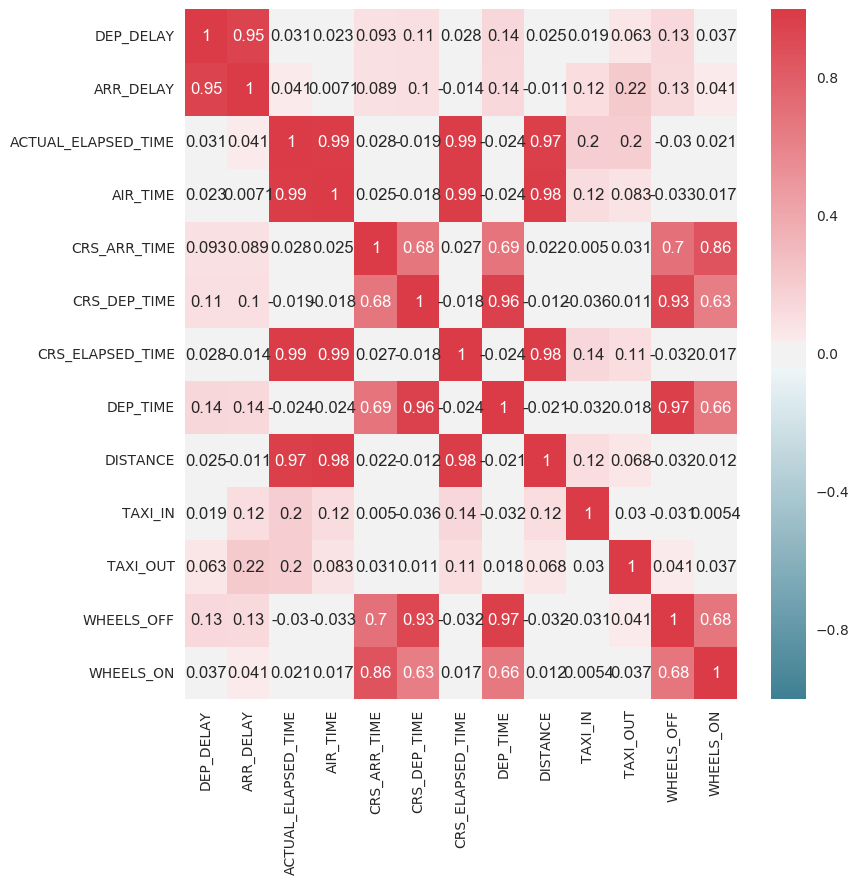

In [20]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Analysis

#### Per the scatter matrix, it appears that departure delays, arrival delays, actual elapsed time, air time, CRS elapsed time, distance, taxi in and taxi out are right skewed.  Also, based on scatter matrix and correlation heat map, there appears to be a strong correlation between multiple variables. 

#### Departure Delay and Arrival Delay are highly correlated with R2=0.95. 
#### Actual elapsed time is highly correlated with Air time and CRS Elapsed time (R2=0.99) and with Distance (R2=0.97)
#### Departure time is highly correlated with Wheels off (R2=0.97), CRS Departure Time (R2=0.96)
#### CRS Arrival time is medium correlated with Wheels On (R2=0.86)

#### Esentially, all departure times and all arrival times are highly correlated with each other, as expected, since generally speaking, the departure time is dictated by when the plane takes off (wheels off), the distance and departure time and when the plane lands (wheels on) dictates the arrival time.

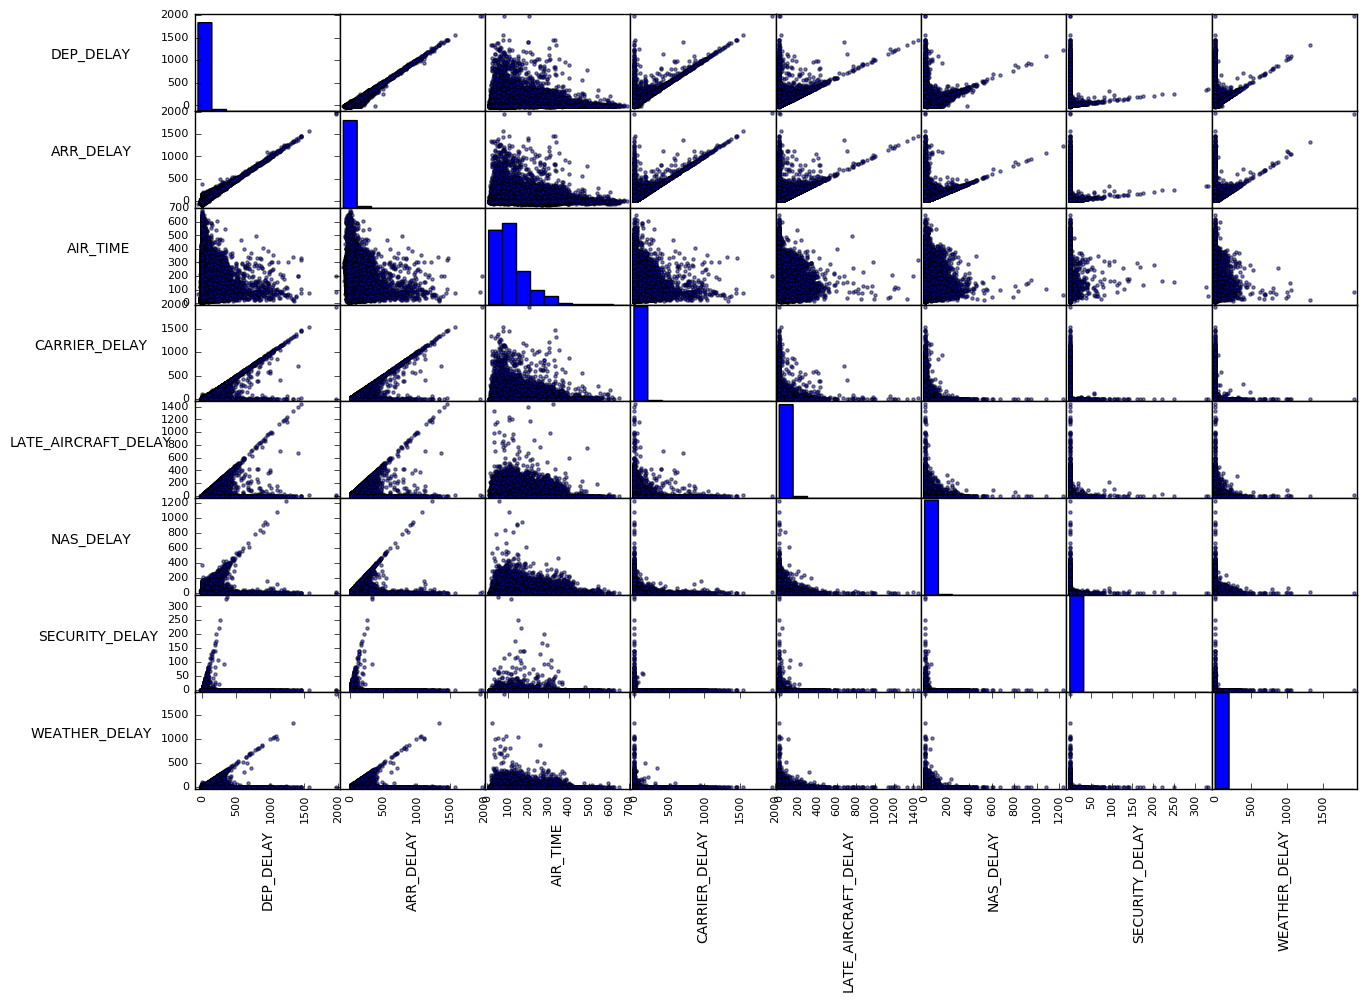

In [16]:
from pandas.tools.plotting import scatter_matrix
df_delays=df_sampled1[['DEP_DELAY','ARR_DELAY','AIR_TIME', 'CARRIER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY','WEATHER_DELAY']]
ax = scatter_matrix(df_delays,figsize=(15, 10))
n = len(df_delays.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        axs = ax[x, y]
        # to make x axis name vertical  
        axs.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        axs.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axs.yaxis.labelpad = 50

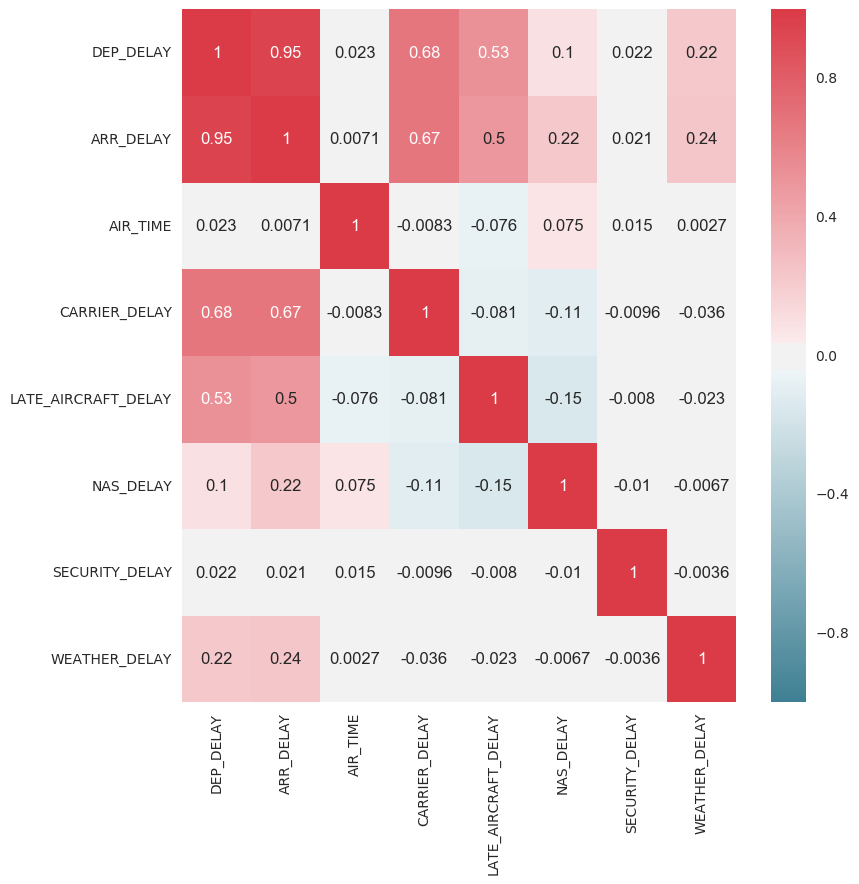

In [17]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_delays.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Analysis 

#### From the scatter plot matrix and correlation heat map of arrival delay and departure delay with different delay types, it appears that both Arrival delay and Departure delay is somewhat correlated with late aircraft delay (0.53) and carrier delay (0.68) only.  Oodly, security delay, weather delay, and nas delay do not effect the departure/arrival delays.  All delay types:  Carrier delay, late aircraft delay, nas delay, security delay, weather delay, all appear to be right skewed.

### Plotting-Delay Rate

Plot to see which Airline group has the maximum delay rate. 

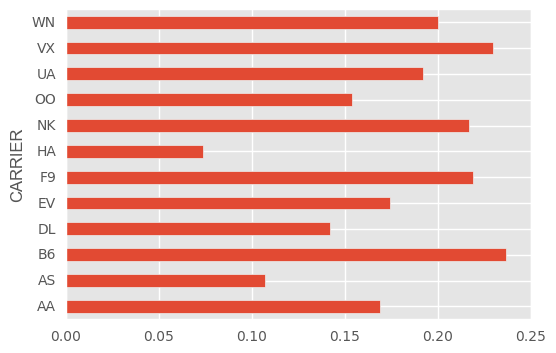

In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.style.use('ggplot')

df_grouped = df_sampled1.groupby(by='CARRIER')
delay_rate = df_grouped.DEP_DEL15.sum() / df_grouped.DEP_DELAY_GROUP.count()
ax = delay_rate.plot(kind='barh')

In [23]:
def is_delayed(x):
    return x > 0

df_sampled['DELAYED'] = df_sampled['DEP_DEL15'].apply(is_delayed)
df_grouped.DEP_DEL15 = df_sampled['DEP_DEL15'].apply(lambda x: x > 0)
df_grouped.DEP_DEL15.value_counts()

False    463287
True     97563 
Name: DEP_DEL15, dtype: int64

In [24]:
not_delayed = df_sampled['DELAYED'].value_counts()[0] # first value of the result above
delayed = df_sampled['DELAYED'].value_counts()[1] # second value of the result above
total_flights = not_delayed + delayed # total count of flights
print float(delayed) / total_flights # converting to float to get a float result

0.173955603102


In [25]:
group_by_carrier = df_sampled.groupby(['CARRIER','DELAYED'])
group_by_carrier.size()

CARRIER  DELAYED
AA       False      75565 
         True       15208 
AS       False      15822 
         True       1888  
B6       False      21813 
         True       6643  
DL       False      78911 
         True       13033 
EV       False      39386 
         True       8099  
F9       False      7596  
         True       2102  
HA       False      7119  
         True       564   
NK       False      11095 
         True       2996  
OO       False      51912 
         True       9289  
UA       False      44441 
         True       10460 
VX       False      5421  
         True       1587  
WN       False      104206
         True       25694 
dtype: int64

In [26]:
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

DELAYED   False   True
CARRIER               
AA       75565   15208
AS       15822   1888 
B6       21813   6643 
DL       78911   13033
EV       39386   8099 
F9       7596    2102 
HA       7119    564  
NK       11095   2996 
OO       51912   9289 
UA       44441   10460
VX       5421    1587 
WN       104206  25694

### Plotting grouped data

We can see clearly from the Count Delays by Carrier table that Southwest (WN) had more delays than any other airline, but all the airlines had proportionally similar rates of delayed flights. We projected this by plotting the delayed and non-delayed flights and by stacking the "True" and "False" delayed values vertically.

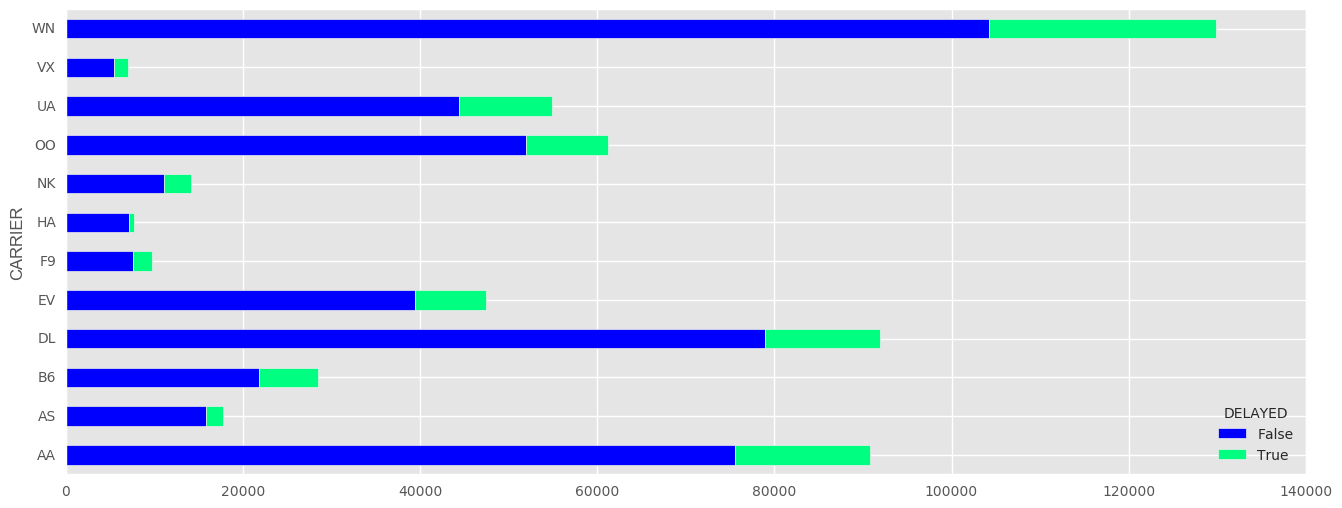

In [27]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

### Plotting-Total Minutes Delay

In this graph we're projecting which airlines contributed most to the total sum minutes of delay. We did this by creating a Pivot table of the daily sum of delay minutes by airline and then plotted the delays as a stacked bar chart.

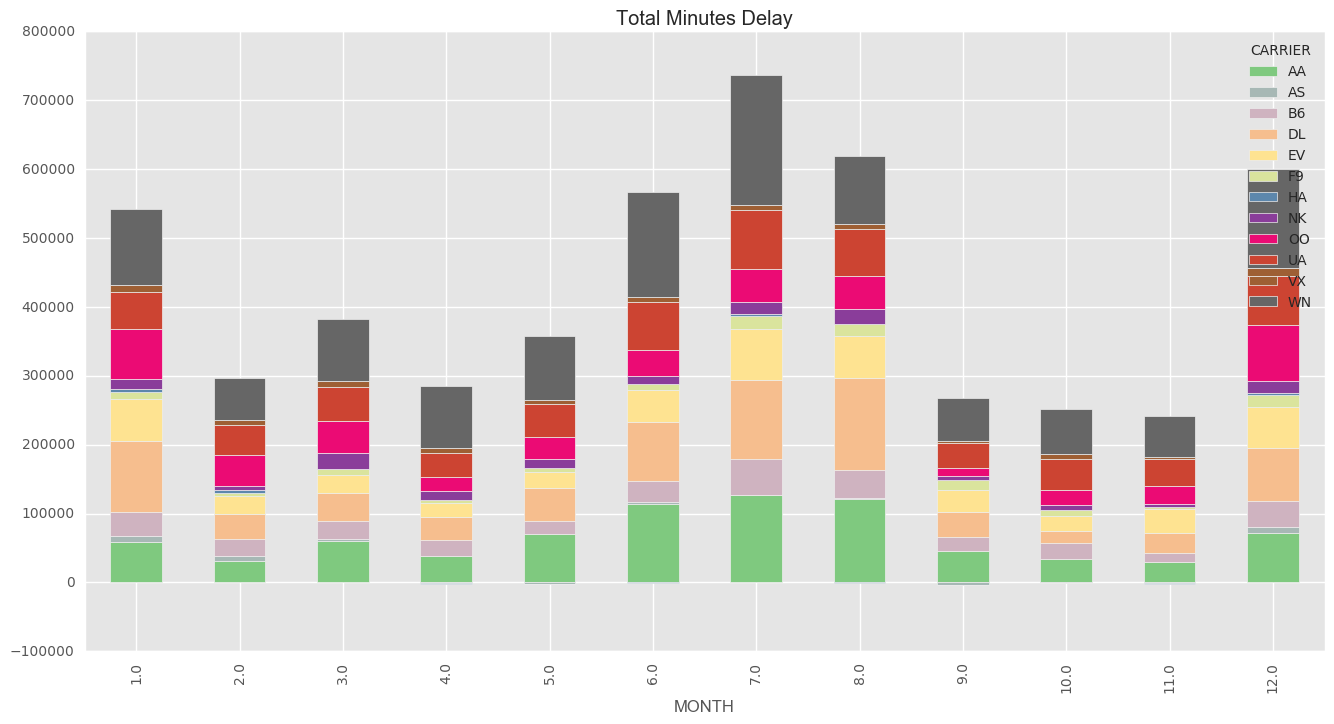

In [28]:
delay_by_day_carrier = df_sampled.pivot_table(index='MONTH', columns='CARRIER', values='DEP_DELAY', aggfunc='sum')
delay_by_day_carrier.plot(kind='bar', figsize=[16,8], stacked=True, colormap='Accent', title='Total Minutes Delay')

### Plotting- Flight Delays by type of Delay

We're building an area chart, or a stacked accumulation of counts, to illustrate the relative contribution of the type of delays. It looks like flights were delayed maximum by the LateAircraftDelay.

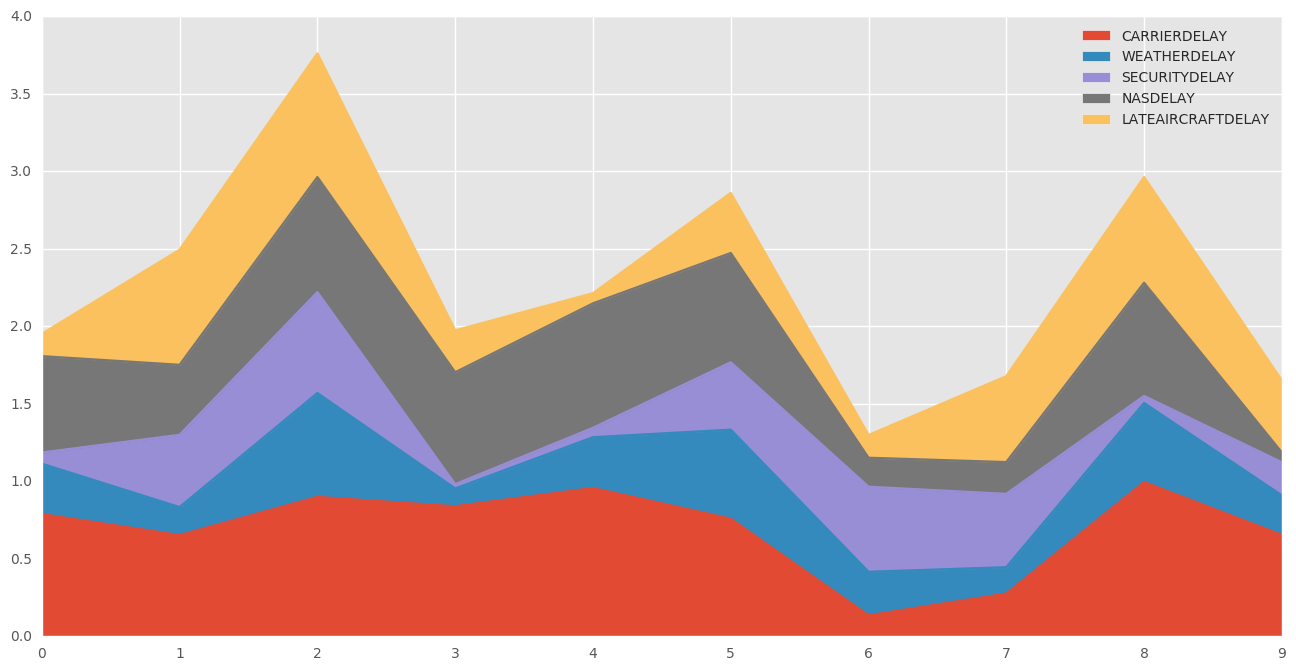

In [29]:
df5 = pd.DataFrame(np.random.rand(10, 5),columns=['CARRIERDELAY', 'WEATHERDELAY', 'SECURITYDELAY','NASDELAY','LATEAIRCRAFTDELAY'])

df5.plot.area(figsize=[16,8]);

# Explore Attributes and Class

# New Features

In order to determine airline reliability, we will create a new boolean flag called "Reliablity".  This new variable will be
computed based on departure delay, arrival delay, diverted flag, and cancellation flag.

Furthermore, few of the features that may have been helpful in determing flight reliability include the following:

    1.  The size of the airport hub - It would be interesting to see whether larger airport hubs are easier to travel out of than
        smaller ones and if the quality/performance of flights is effected based on the size.
    2.  The quality of the airline based on the revenue generated by them.  Is an airline that is in a bigger city more reliable 
        than an airline that serves areas where there are only few airline options.

# Exceptional Work

### PCA Analysis

The main purpose of a principal component analysis is the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.
Our aim of the principal component analysis is to project a feature space onto a smaller subspace that represents our data “well”. 

In [17]:
df_imputed=df_sampled1[['DEP_DELAY','ARR_DELAY','ACTUAL_ELAPSED_TIME', 'AIR_TIME','CRS_ARR_TIME','CRS_DEP_TIME','CRS_ELAPSED_TIME','DEP_TIME','DISTANCE',
                     'TAXI_IN','TAXI_OUT','WHEELS_OFF','WHEELS_ON','CARRIER']]

In [18]:
import pandas as pd
import numpy as np
df = pd.DataFrame(df_imputed[:50])

In [19]:
df['CARRIER'] = pd.Categorical.from_array(df.CARRIER).codes

C:\Users\robcline\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

Categorical.from_array is deprecated, use Categorical instead



In [20]:
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2016 to 2016
Data columns (total 14 columns):
DEP_DELAY              50 non-null float64
ARR_DELAY              50 non-null float64
ACTUAL_ELAPSED_TIME    50 non-null float64
AIR_TIME               50 non-null float64
CRS_ARR_TIME           50 non-null int64
CRS_DEP_TIME           50 non-null int64
CRS_ELAPSED_TIME       50 non-null float64
DEP_TIME               50 non-null float64
DISTANCE               50 non-null int64
TAXI_IN                50 non-null float64
TAXI_OUT               50 non-null float64
WHEELS_OFF             50 non-null float64
WHEELS_ON              50 non-null float64
CARRIER                50 non-null int8
dtypes: float64(10), int64(3), int8(1)
memory usage: 5.5 KB
None


DEP_DELAY  ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME  CRS_ARR_TIME  \
YEAR                                                                      
2016 -24.0      -17.0       47.0                 19.0      2352           
2016  24.0       27.0       66.0                 50.0      1503           
2016 -19.0      -16.0       153.0                136.0     1300           
2016  0.0       -14.0       369.0                352.0     2103           
2016 -9.0       -18.0       68.0                 45.0      1842           

      CRS_DEP_TIME  CRS_ELAPSED_TIME  DEP_TIME  DISTANCE  TAXI_IN  TAXI_OUT  \
YEAR                                                                          
2016  2312          40.0              2248.0    83        8.0      20.0       
2016  1400          63.0              1424.0    223       6.0      10.0       
2016  1030          150.0             1011.0    937       7.0      10.0       
2016  1740          383.0             1740.0    2677      5.0      12.0       
2016  1725          77.0              1716.0    284       4.0      19.0       

      WHEELS_OFF  WHEELS_ON  CARRIER  
YEAR                                  
2016  2308.0      2327.0     6        
2016  1434.0      1524.0     3        
2016  1021.0      1237.0     1        
2016  1752.0      2044.0     3        
2016  1735.0      1820.0     4

### Step 1: Load and Standardize Data

First we’ll load the data and store it in a pandas dataframe. The data set contains data from 5600 users (instances). 
Even though all of the features in the dataset are measured on the same scale (a 0 through 5 rating), we must make sure that we standardize the data by transforming it onto a unit scale (mean=0 and variance=1). Also, all null (NaN) values were converted to 0. It is necessary to transform data because PCA can only be applied on numerical data.

In [30]:
# now let's use PCA, and LDA to find the two "best" dimensions of this data
# these are linear transforms to help project the features into something more understandable

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler


X = df.as_matrix(columns=df.columns[0:])
#y = df.as_matrix(columns=df.columns[14:])
y = df['CARRIER'].values
X = (X - np.mean(X, 0)) / np.std(X, 0)


### Step 2: Covariance Matrix and Eigendecomposition

Next, a covariance matrix is created based on the standardized data. The covariance matrix is a representation of the covariance between each feature in the original dataset. 
The covariance matrix can be found as follows:

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

lda = LDA(n_components=2)
X_lda = lda.fit(X,y).transform(X)

# print the components

print ('pca:', pca.components_)
print ('lda:', lda.scalings_.T)

pca: [[-0.22591133 -0.24529499  0.38865343  0.39094533 -0.13380588 -0.24364559
   0.39027678 -0.25931001  0.37716838  0.12651305 -0.0090253  -0.25802371
  -0.12051743 -0.22053612]
 [ 0.1095552   0.10907054  0.24734559  0.22832147  0.34008714  0.39354191
   0.23634817  0.39078346  0.24247943  0.1740998   0.15244104  0.39653801
   0.28247088 -0.18522041]]
lda: [[ -3.46634969e-14   4.06650718e-14   2.08622819e-14   2.22146730e-14
   -5.61799270e-15   3.85777971e-14  -2.19201187e-14   9.10489995e-14
   -1.48992443e-14  -3.93227192e-15  -8.35508883e-15  -1.25945448e-13
    6.84916554e-16  -3.27073341e+16]]


C:\Users\robcline\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.



### Step 3: Selecting Principal Components

Eigenvectors, or principal components, are a normalized linear combination of the features in the original dataset. The first principal component captures the most variance in the original variables, and the second component is a representation of the second highest variance within the dataset. 

For example, if you were to plot data from a dataset that contains two features, the following illustrates that principal component 1 (PC1) represents the direction of the most variation between the two features and principal component 2 (PC2) represents the second most variation between the two plotted features. 

In [24]:
#Explained variance
print (pca.explained_variance_ratio_ )

[ 0.34940801  0.248181  ]


As can be seen below,the first two principal components describe approximately 60% of the variance in the data. In order to gain a more comprehensive view of how each principal component explains the variance within the data, we will construct a scree plot. A scree plot displays the variance explained by each principal component within the analysis.

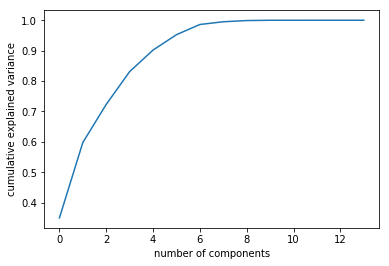

In [27]:
#Explained variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

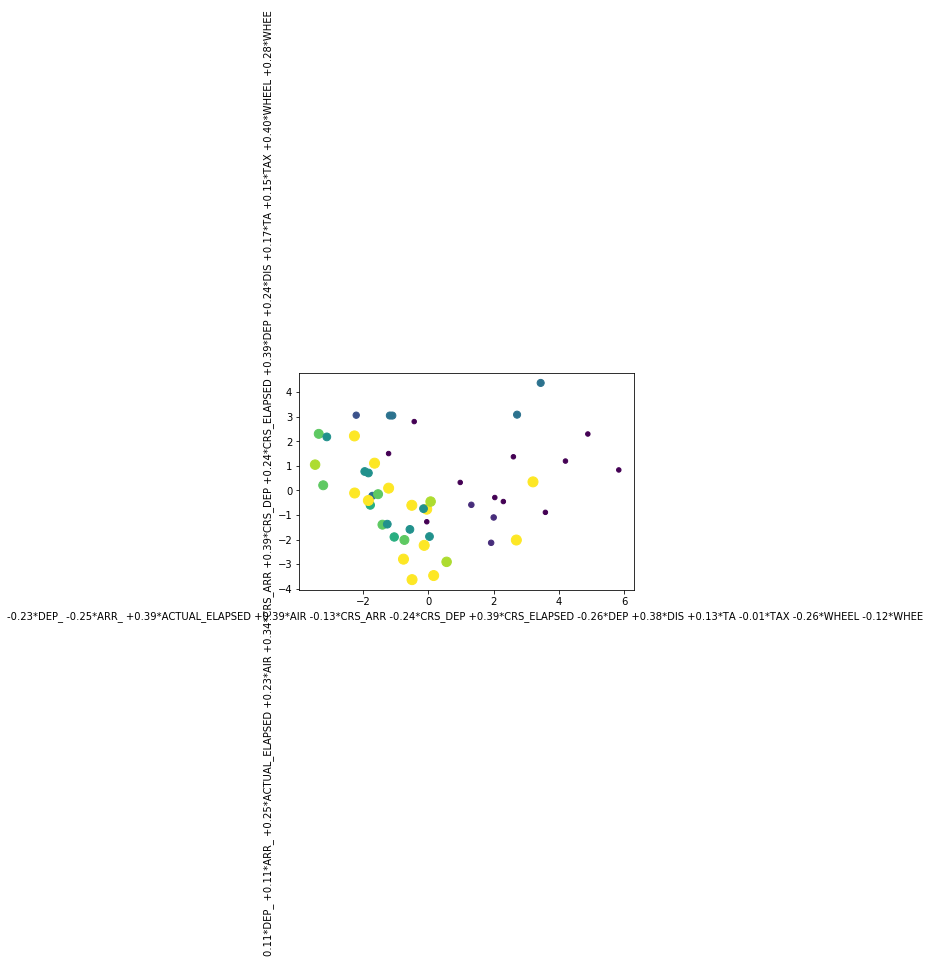

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import math

def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, df.columns[:13]) 
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, df.columns[:13]) 


# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])


from pandas.tools.plotting import scatter_plot

# scatter plot the output, with the names crated from the weights
ax = scatter_plot(df_pca, pca_weight_strings[0], pca_weight_strings[1], c=y, s=(y+2)*10)
newfig = plt.figure()
#ax = scatter_plot(df_lda, lda_weight_strings[0],lda_weight_strings[1], c=y, s=(y+2)*10)
#newfig = plt.figure()

The plot above is a visual representation of this PCA function on the flights data. As you can see, a 2D transformation  could not separate one class from the other classes (Carriers:  ) Another dimension may be needed to separate the classes.